# 00 Preface

**User friendly molecular dynamics simulation combining GROMACS (GROningen MAchine for Chemical Simulations) and Google Collaboratory framework:  A complete guide**

This Jupyter notebook is designed to facilitate Molecular Dynamics (MD) simulations using GROMACS. It serves as an adaptable jupyter notebook for conducting MD simulations and accompanies the supplimentary file for the follwoing Article:

**Molecular Dynamics Simulation of Wild and Mutant PSMB8 Protein Using Google Collaboratory Framework: Implications for the Restoration of Inflammation in Experimental Autoimmune Encephalomyelitis (EAE) Pathogenesis** ([link here](link will be updated asap)).

---
**Repository link:**
- ColabMDA: https://github.com/paulshamrat/ColabMDA

**Note and Acknowledgement:**

We would like to thanks the authors who developed jupyter notebook framework for molecular dynamics simulation on google colab. Please always refer the original GROMACS manual for the simulaiton guide. We are grateful to the Authors of the follwoing article which made possible to adapt this md simulation protocol.

- F. Engelberger, P. Galaz-Davison, G. Bravo, M. Rivera, and C. A. Ramírez-Sarmiento, “Developing and Implementing Cloud-Based Tutorials That Combine Bioinformatics Software, Interactive Coding, and Visualization Exercises for Distance Learning on Structural Bioinformatics,” J. Chem. Educ., vol. 98, no. 5, pp. 1801–1807, May 2021, doi: 10.1021/acs.jchemed.1c00022.

- J. A. Lemkul, “From Proteins to Perturbed Hamiltonians: A Suite of Tutorials for the GROMACS-2018 Molecular Simulation Package [Article v1.0],” Living J. Comput. Mol. Sci., vol. 1, no. 1, pp. 5068–5068, 2019, doi: 10.33011/LIVECOMS.1.1.5068.

- P. R. Arantes, M. D. Polêto, C. Pedebos, and R. Ligabue-Braun, “Making it Rain: Cloud-Based Molecular Simulations for Everyone.,” Journal of chemical information and modeling, vol. 61, no. 10. United States, pp. 4852–4856, Oct. 2021. doi: 10.1021/acs.jcim.1c00998.

- R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations. In S. Benthall and S. Rostrup, editors, Proceedings of the 15th Python in Science Conference, pages 98-105, Austin, TX, 2016. SciPy, doi:10.25080/majora-629e541a-00e.

- Gowers, R. J., Linke, M., Barnoud, J., Reddy, T. J., Melo, M. N., Seyler, S. L., ... & Beckstein, O. (2016, July). MDAnalysis: a Python package for the rapid analysis of molecular dynamics simulations. In Proceedings of the 15th python in science conference (Vol. 98, p. 105). Austin, TX: SciPy.

- Abraham, M. J., Murtola, T., Schulz, R., Páll, S., Smith, J. C., Hess, B., & Lindahl, E. (2015). GROMACS: High performance molecular simulations through multi-level parallelism from laptops to supercomputers. SoftwareX, 1, 19-25.


# 1 Installation

In [ ]:
# NLP
! python -m pip install nltk==3.5
! python -m pip install numpy matplotlib

# MDAnalysis
! pip install --upgrade MDAnalysis
! pip install --upgrade MDAnalysisTests
! pip install --upgrade MDAnalysisData

# mdtraj, nglview, cython, pytraj, tsplot
# gnuplot, prody
! pip install mdtraj
! pip install nglview
! pip install cython --upgrade
! pip install pytraj
! pip install tsplot

# 2 Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Let's make a folder first. We need to import the os and path library
import os
from pathlib import Path

#Then, we define the path of the folder we want to create.
#Notice that the HOME folder for a hosted runtime in colab is /content/
mdpath = Path("/content/gdrive/MyDrive/works/P53047-Afumigatus")
#mdpath = Path("/content")


#Now, we create the folder using the os.mkdir() command
#The if conditional is just to check whether the folder already exists
#In which case, python returns an error
if os.path.exists(mdpath):
  print("path already exists")
if not os.path.exists(mdpath):
  os.mkdir(mdpath)
  print("path was succesfully created")

# Change path
#First, we will change to the new folder. We will use python now :)
os.chdir(mdpath)

path already exists


# 3 Fundamental Dynamics Analysis (Single Trajectory)

## 3.1 Fundamental Dynamics Analysis (Single Trajectory)

### RMSD

In [ ]:
import MDAnalysis as mda
# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/P53047-Afumigatus/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/P53047-Afumigatus/md_0_1_all.xtc')

# select protein atoms for analysis
protein = u.select_atoms('protein')

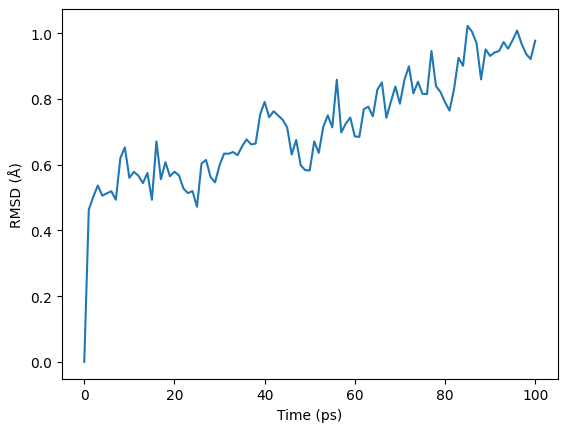

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt

# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/P53047-Afumigatus/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/P53047-Afumigatus/md_0_1_all.xtc')

# calculate the RMSD
ref = u.select_atoms('protein')
R = rms.RMSD(u, ref, select='backbone', groupselections=['protein'])
R.run()

# plot the RMSD
plt.plot(R.rmsd[:,1], R.rmsd[:,2])
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Å)')

# save the plot as a PNG file
plt.savefig('rmsd_plot.png', dpi=300)

# show the plot
plt.show()


### RMSF CA

/usr/local/lib/python3.10/dist-packages/MDAnalysis/analysis/rms.py:891: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


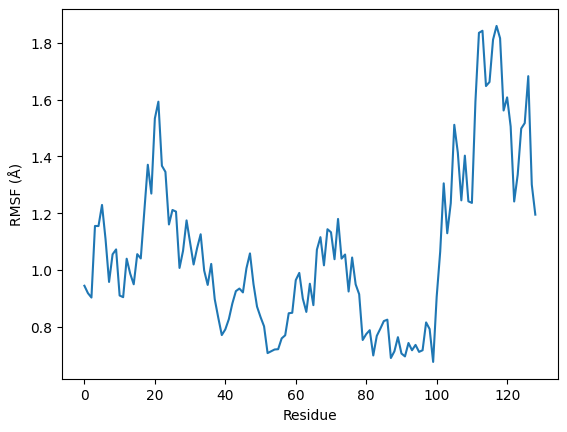

In [ ]:
# rmsf ;  c-alpha
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import numpy as np
import matplotlib.pyplot as plt

# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/1aki/c-alpha.pdb', '/content/gdrive/MyDrive/works/1aki/c-alpha_all.dcd')

# select C-alpha atoms for analysis
calpha = u.select_atoms('protein and name CA')

# calculate the RMSF
R = rms.RMSF(calpha, C_alpha=True).run()
rmsf_analysis = R.rmsf

# plot the RMSF
plt.plot(rmsf_analysis)
plt.xlabel('Residue')
plt.ylabel('RMSF (Å)')

# save the plot as a PNG file
plt.savefig('rmsf_ca_plot.png', dpi=300)

# show the plot
plt.show()


### RG

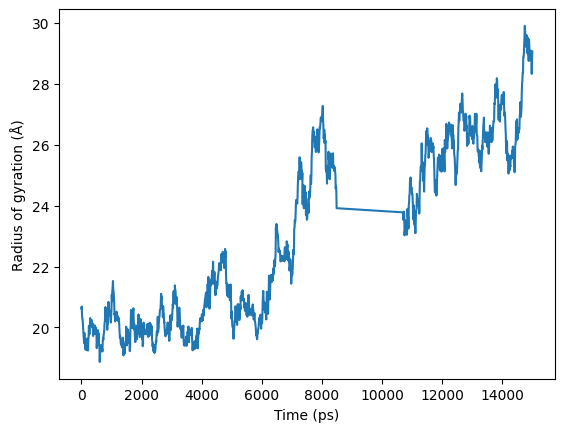

In [ ]:
#Rg
# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/BCL2-unreviewed/BCL2-A2AHX7-78/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/BCL2-unreviewed/BCL2-A2AHX7-78/md_1_all.xtc')

# select protein atoms for analysis
protein = u.select_atoms('protein')

# calculate the radius of gyration
com = np.array([protein.center_of_mass()])
Rg_list = []
time_list = []
for ts in u.trajectory:
    Rg = np.sqrt(np.sum((protein.positions - com)**2)/len(protein))
    Rg_list.append(Rg)
    time_list.append(ts.time)

# plot the radius of gyration
plt.plot(time_list, Rg_list)
plt.xlabel('Time (ps)')
plt.ylabel('Radius of gyration (Å)')

# save the plot as a PNG file
plt.savefig('rg_plot.png', dpi=300)

# show the plot
plt.show()


## 3.2 Fundamental Dynamics Analysis (Multiple trajectories)


RMSD RMSF CA RG

### RMSD

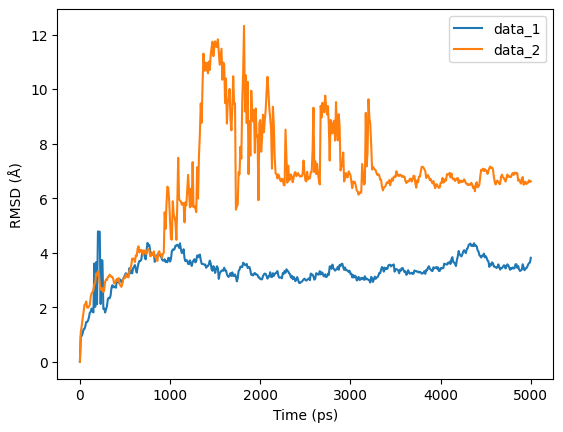

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt

# load the trajectories and topologies
u1 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/md_0_1.xtc')

# select the protein atoms for RMSD calculation
ref1 = u1.select_atoms('protein')
ref2 = u2.select_atoms('protein')

# calculate the RMSD
R1 = rms.RMSD(u1, ref1, select='backbone', groupselections=['protein'])
R1.run()
R2 = rms.RMSD(u2, ref2, select='backbone', groupselections=['protein'])
R2.run()

# plot the RMSD
fig, ax = plt.subplots()
ax.plot(R1.rmsd[:,1], R1.rmsd[:,2], label='data_1')
ax.plot(R2.rmsd[:,1], R2.rmsd[:,2], label='data_2')
ax.legend()
ax.set_xlabel('Time (ps)')
ax.set_ylabel('RMSD (Å)')

# save the plot as a PNG file
plt.savefig('rmsd_plot_230425.png', dpi=300)

# show the plot
plt.show()


### RMSF CA

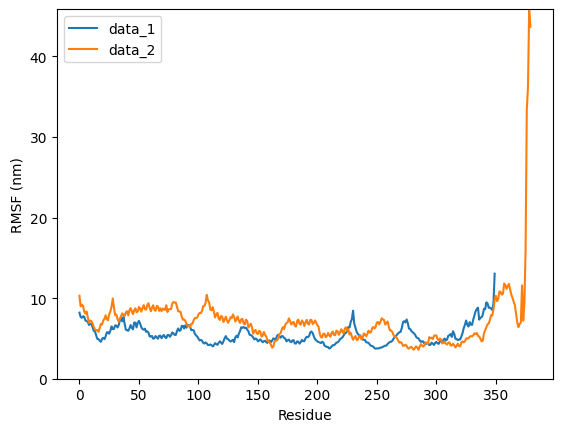

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
from MDAnalysis.analysis.rms import RMSF
import matplotlib.pyplot as plt

# Load the two trajectory and topology files
u1 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/md_0_1.xtc')

# Select the C-alpha atoms
calpha1 = u1.select_atoms('protein and name CA')
calpha2 = u2.select_atoms('protein and name CA')

# Align the protein to the reference structure
ref1 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro')
ref2 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/1AKI_solv_ions.gro')
R1 = rms.RMSD(u1, ref1, select='protein and name CA', center=True, superposition=True)
R1.run()
R2 = rms.RMSD(u2, ref2, select='protein and name CA', center=True, superposition=True)
R2.run()

# Calculate RMSF for each trajectory
RMSF1 = RMSF(calpha1).run()
RMSF2 = RMSF(calpha2).run()

# Plot RMSF values of both trajectories on the same plot
fig, ax = plt.subplots()
ax.plot(RMSF1.rmsf, label='data_1')
ax.plot(RMSF2.rmsf, label='data_2')
ax.set_xlabel('Residue')
ax.set_ylabel('RMSF (nm)')
ax.legend()

# Set the y-axis limits based on the range of your RMSF values
ymin = 0
ymax = max(RMSF1.rmsf.max(), RMSF2.rmsf.max()) + 0.1
ax.set_ylim(ymin, ymax)

# Save the plot as a high-resolution PNG image
fig.savefig('rmsf_ca_230425.png', dpi=300)

plt.show()


### RG

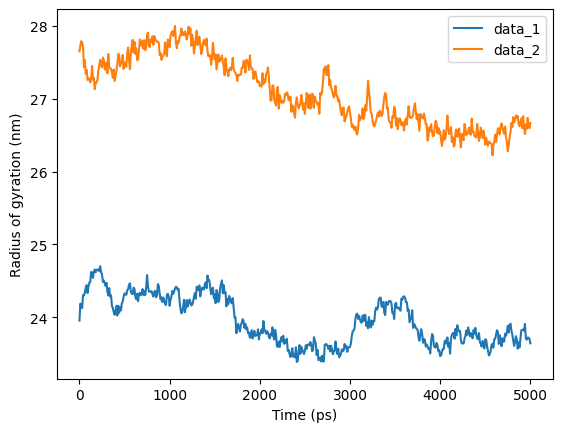

In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology files for both systems
u1 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/md_0_1.xtc')

# Select only protein atoms
protein_sel1 = u1.select_atoms('protein')
protein_sel2 = u2.select_atoms('protein')

# Initialize arrays to store Rg values and time
Rg1 = np.zeros(len(u1.trajectory))
Rg2 = np.zeros(len(u2.trajectory))
time1 = np.zeros(len(u1.trajectory))
time2 = np.zeros(len(u2.trajectory))

# Loop over all frames in trajectory and calculate Rg
for ts in u1.trajectory:
    Rg1[ts.frame] = protein_sel1.radius_of_gyration()
    time1[ts.frame] = u1.trajectory.time

for ts in u2.trajectory:
    Rg2[ts.frame] = protein_sel2.radius_of_gyration()
    time2[ts.frame] = u2.trajectory.time

# Plot Rg values of both systems on the same plot
fig, ax = plt.subplots()
ax.plot(time1, Rg1, label='data_1')
ax.plot(time2, Rg2, label='data_2')
ax.set_xlabel('Time (ps)')
ax.set_ylabel('Radius of gyration (nm)')
ax.legend()

# Save the plot as a high-resolution PNG image
fig.savefig('rg_230425.png', dpi=300)

plt.show()


# 4 Essential Dynamics Analysis
- Clustering
- Cartesian Coordinate PCA
- Pairwise Distance PCA
- Solvent Accesible Surface Area

## 4.1 Reading Data

In [ ]:
%cd /content/gdrive/MyDrive/works/1aki

/content/gdrive/MyDrive/works/1aki


In [ ]:
!pwd

/content/gdrive/MyDrive/works/1aki


In [ ]:
import MDAnalysis as mda
u = mda.Universe('/content/gdrive/MyDrive/works/P53047-Afumigatus/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/P53047-Afumigatus/md_1_all.xtc')


In [ ]:
import MDAnalysis as mda
u = mda.Universe('/content/gdrive/MyDrive/works/P53047-Afumigatus/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/P53047-Afumigatus/md_1_all.xtc')
ag = u.select_atoms("name CA")
ag.write("c-alpha.pdb")

In [ ]:
# Pass in the frames keyword to write out trajectories.
ag.write('c-alpha_all.xtc', frames='all')

In [ ]:
# Slice or index the trajectory to choose which frames to write:
ag.write('c-alpha_skip2.trr', frames=u.trajectory[::2])
ag.write('c-alpha_some.dcd', frames=u.trajectory[[0,2,3]])

In [ ]:
# make xtc to dcd with all frames
ag.write('c-alpha_all.trr', frames='all')
ag.write('c-alpha_all.dcd', frames='all')

In [ ]:
# Alternatively, iterate over the trajectory frame-by-frame with Writer(). This requires you to pass in the number of atoms to write.
with mda.Writer('c-alpha.xyz', ag.n_atoms) as w:
    for ts in u.trajectory:
        w.write(ag)

In [ ]:
!pwd

/content/gdrive/MyDrive/works/P53047-Afumigatus


In [ ]:
import mdtraj as md
t = md.load('c-alpha_all.xtc', top='c-alpha.pdb')
print(t)

<mdtraj.Trajectory with 51 frames, 317 atoms, 317 residues, and unitcells>


In [ ]:
# lets take a look at the first ten frames
print(t[1:10])

<mdtraj.Trajectory with 9 frames, 317 atoms, 317 residues, and unitcells>


In [ ]:
# lets take a look at the last ten frames
print(t[-10:])

<mdtraj.Trajectory with 10 frames, 317 atoms, 317 residues, and unitcells>


In [ ]:
>>> # or maybe the last frame?
>>> print(t[-1])

<mdtraj.Trajectory with 1 frames, 317 atoms, 317 residues, and unitcells>


In [ ]:
print(t.xyz.shape)

(51, 317, 3)


In [ ]:
# the simulation time (in picoseconds) of the first 10 frames
print(t.time[0:10])

[  0. 100. 200. 300. 400. 500. 600. 700. 800. 900.]


In [ ]:
# the simulation time (in picoseconds) of th last 10 frames
print(t.time[-10:])

[4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800. 4900. 5000.]


In [ ]:
# or the unitcell lengths in the last frame? (in nanometers of course)
t.unitcell_lengths[-1]

array([10.9411545, 10.9411545, 10.9411545], dtype=float32)

In [ ]:
# the hdf5 format stores the topology inside the file for convenience
t[::2].save('halftraj.h5')

In [ ]:
# the hdf5 format stores the topology inside the file for convenience
t[-10:].save('last10f-traj.h5')

In [ ]:
# the hdf5 format stores the topology inside the file for convenience
t[-1000:].save('last1000f-traj.h5')

In [ ]:
# the hdf5 format stores the topology inside the file for convenience
t[-1000:].save('last100f-traj.h5')

In [ ]:
# the format will be parsed based on the extension, or you can call the
# format-specific save methods
t[0:10].save_dcd('first-ten-frames.dcd')

In [ ]:
# the format will be parsed based on the extension, or you can call the
# format-specific save methods
t[-10:].save_dcd('last-ten-frames.dcd')

In [ ]:
# the format will be parsed based on the extension, or you can call the
# format-specific save methods
t[-10:].save_dcd('last-ten-frames.dcd')

In [ ]:
atoms_to_keep = [a.index for a in t.topology.atoms if a.name == 'CA']
t.restrict_atoms(atoms_to_keep)  # this acts inplace on the trajectory
t.save('CA-only.h5')

## 4.2 Atom Selection

In [ ]:
!pwd

/content/gdrive/MyDrive/works/P53047-Afumigatus


In [ ]:
from __future__ import print_function
import mdtraj as md

traj = md.load('CA-only.h5')
print(traj)

<mdtraj.Trajectory with 51 frames, 317 atoms, 317 residues, and unitcells>


/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


In [ ]:
print('How many atoms?    %s' % traj.n_atoms)
print('How many residues? %s' % traj.n_residues)

How many atoms?    317
How many residues? 317


In [ ]:
frame_idx = 4 # zero indexed frame number
atom_idx = 9 # zero indexed atom index
print('Where is the fifth atom at the tenth frame?')
print('x: %s\ty: %s\tz: %s' % tuple(traj.xyz[frame_idx, atom_idx,:]))

Where is the fifth atom at the tenth frame?
x: 8.215	y: 5.736	z: 3.8890002


In [ ]:
topology = traj.topology
print(topology)

<mdtraj.Topology with 1 chains, 317 residues, 317 atoms, 0 bonds>


In [ ]:
print('Fifth atom: %s' % topology.atom(4))
print('All atoms: %s' % [atom for atom in topology.atoms])

Fifth atom: GLY5-CA
All atoms: [MET1-CA, ALA2-CA, LYS3-CA, ASP4-CA, GLY5-CA, PHE6-CA, GLU7-CA, LEU8-CA, TYR9-CA, ARG10-CA, TYR11-CA, THR12-CA, PRO13-CA, GLU14-CA, LEU15-CA, GLY16-CA, ALA17-CA, SER18-CA, ILE19-CA, LEU20-CA, PHE21-CA, THR22-CA, VAL23-CA, LEU24-CA, PHE25-CA, ALA26-CA, VAL27-CA, SER28-CA, GLY29-CA, VAL30-CA, ALA31-CA, PHE32-CA, VAL33-CA, ILE34-CA, LEU35-CA, LEU36-CA, PHE37-CA, HIS38-CA, TYR39-CA, SER40-CA, VAL41-CA, LYS42-CA, SER43-CA, LYS44-CA, ARG45-CA, ARG46-CA, VAL47-CA, GLY48-CA, SER49-CA, LEU50-CA, MET51-CA, LYS52-CA, SER53-CA, GLN54-CA, PRO55-CA, VAL56-CA, LEU57-CA, ARG58-CA, TYR59-CA, TYR60-CA, GLY61-CA, THR62-CA, VAL63-CA, ASN64-CA, LEU65-CA, ALA66-CA, GLY67-CA, ALA68-CA, TYR69-CA, ILE70-CA, PRO71-CA, PHE72-CA, ILE73-CA, PHE74-CA, GLY75-CA, CYS76-CA, PHE77-CA, VAL78-CA, GLU79-CA, CYS80-CA, VAL81-CA, GLY82-CA, PHE83-CA, ALA84-CA, PHE85-CA, ARG86-CA, CYS87-CA, LYS88-CA, SER89-CA, SER90-CA, LYS91-CA, ASP92-CA, THR93-CA, THR94-CA, LEU95-CA, LEU96-CA, ASN97-CA, PRO98-C

In [ ]:
print('Second residue: %s' % traj.topology.residue(1))
print('All residues: %s' % [residue for residue in traj.topology.residues])

Second residue: ALA2
All residues: [MET1, ALA2, LYS3, ASP4, GLY5, PHE6, GLU7, LEU8, TYR9, ARG10, TYR11, THR12, PRO13, GLU14, LEU15, GLY16, ALA17, SER18, ILE19, LEU20, PHE21, THR22, VAL23, LEU24, PHE25, ALA26, VAL27, SER28, GLY29, VAL30, ALA31, PHE32, VAL33, ILE34, LEU35, LEU36, PHE37, HIS38, TYR39, SER40, VAL41, LYS42, SER43, LYS44, ARG45, ARG46, VAL47, GLY48, SER49, LEU50, MET51, LYS52, SER53, GLN54, PRO55, VAL56, LEU57, ARG58, TYR59, TYR60, GLY61, THR62, VAL63, ASN64, LEU65, ALA66, GLY67, ALA68, TYR69, ILE70, PRO71, PHE72, ILE73, PHE74, GLY75, CYS76, PHE77, VAL78, GLU79, CYS80, VAL81, GLY82, PHE83, ALA84, PHE85, ARG86, CYS87, LYS88, SER89, SER90, LYS91, ASP92, THR93, THR94, LEU95, LEU96, ASN97, PRO98, TYR99, ILE100, ILE101, GLN102, THR103, VAL104, PHE105, LEU106, LEU107, VAL108, SER109, PRO110, THR111, LEU112, TYR113, ALA114, ALA115, SER116, ILE117, TYR118, MET119, ILE120, PHE121, GLY122, ARG123, MET124, ALA125, THR126, LEU127, LEU128, PHE129, ALA130, GLU131, ASN132, LEU133, MET134, 

In [ ]:
atom = topology.atom(10)
print('''Hi! I am the %sth atom, and my name is %s.
I am a %s atom with %s bonds.
I am part of an %s residue.''' % ( atom.index, atom.name, atom.element.name, atom.n_bonds, atom.residue.name))

Hi! I am the 10th atom, and my name is CA.
I am a carbon atom with 0 bonds.
I am part of an TYR residue.


## 4.3 Put Everything Together

In [ ]:
print([atom.index for atom in topology.atoms if atom.element.symbol is 'C' and atom.is_sidechain])

[]


<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-35-d105203df8e0>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print([atom.index for atom in topology.atoms if atom.element.symbol is 'C' and atom.is_sidechain])


In [ ]:
print([residue for residue in topology.chain(0).residues if residue.index % 2 == 0])

[MET1, LYS3, GLY5, GLU7, TYR9, TYR11, PRO13, LEU15, ALA17, ILE19, PHE21, VAL23, PHE25, VAL27, GLY29, ALA31, VAL33, LEU35, PHE37, TYR39, VAL41, SER43, ARG45, VAL47, SER49, MET51, SER53, PRO55, LEU57, TYR59, GLY61, VAL63, LEU65, GLY67, TYR69, PRO71, ILE73, GLY75, PHE77, GLU79, VAL81, PHE83, PHE85, CYS87, SER89, LYS91, THR93, LEU95, ASN97, TYR99, ILE101, THR103, PHE105, LEU107, SER109, THR111, TYR113, ALA115, ILE117, MET119, PHE121, ARG123, ALA125, LEU127, PHE129, GLU131, LEU133, ILE135, PRO137, ARG139, ASN141, THR143, PHE145, ILE147, ASP149, GLY151, LEU153, LEU155, ALA157, GLY159, ALA161, MET163, LYS165, THR167, ALA169, SER171, SER173, LEU175, THR177, GLY179, PHE181, GLN183, ALA185, PHE187, LEU189, ILE191, ASN193, VAL195, PHE197, PHE199, MET201, LYS203, PRO205, ASN207, SER209, ARG211, GLY213, TRP215, TYR217, ASN219, ALA221, LEU223, ASN225, PHE227, ILE229, ILE231, SER233, VAL235, ALA237, GLU239, ILE241, GLY243, ASP245, GLU247, ALA249, HIS251, TRP253, LEU255, ILE257, ASP259, LEU261, MET263

## 4.4 Atom selection language

In [ ]:
print(topology.select('resid 1 to 2'))

[1 2]


In [ ]:
print(topology.select('name N and backbone'))

[]


In [ ]:
selection = topology.select_expression('name CA and resid 1 to 2')
print(selection)

[atom.index for atom in topology.atoms if ((atom.name == 'CA') and (1 <= atom.residue.index <= 2))
]


# 5 Clustering
with md.rmsd() and scipy.cluster.hierarchy()


In [ ]:
# where-am-i?
! pwd

/content/gdrive/MyDrive/works/P53047-Afumigatus


In [ ]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

In [ ]:
traj = md.load('CA-only.h5')

In [ ]:
# compute pairwise rmsd between conformations
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))

Max pairwise rmsd: 0.282951 nm


In [ ]:
# Clustering only accepts reduced form. Squareform's checks are too stringent
# when calculating a massinve numer of frames initially it was 1e-6; changed to 1e6 and the plot generated.
assert np.all(distances - distances.T < 1e6)
reduced_distances = squareform(distances, checks=False)

In [ ]:
linkage = scipy.cluster.hierarchy.linkage(reduced_distances, method='average')

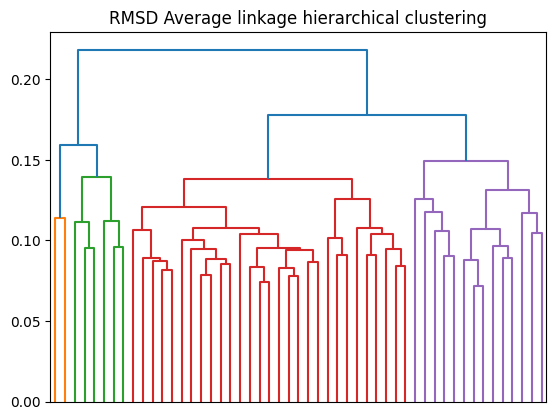

In [ ]:
plt.title('RMSD Average linkage hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')

# save the plot as a PNG file
plt.savefig('RMSD Average linkage hierarchical clustering.png', dpi=300)

# show the plot
plt.show()

# 6 PCA
Principal components analysis (PCA) with scikit-learn



In [ ]:
%matplotlib inline
from __future__ import print_function
import mdtraj as md
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
traj = md.load('CA-only.h5')
traj

/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


<mdtraj.Trajectory with 51 frames, 317 atoms, 317 residues, and unitcells at 0x7807692e3eb0>

In [ ]:
pca1 = PCA(n_components=2)
traj.superpose(traj, 0)

<mdtraj.Trajectory with 51 frames, 317 atoms, 317 residues, and unitcells at 0x7807692e3eb0>

In [ ]:
reduced_cartesian = pca1.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
print(reduced_cartesian.shape)

(51, 2)


### 6.1 Cartesian Coordinate PCA

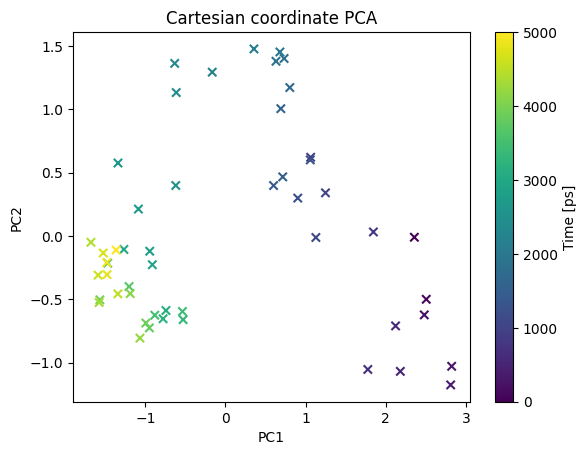

In [ ]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=traj.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

# save the plot as a PNG file
plt.savefig('Cartesian coordinate PCA', dpi=300)

# show the plot
plt.show()

### 6.2 Pairwise Distance PCA

In [ ]:
pca2 = PCA(n_components=2)

from itertools import combinations
# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(traj.n_atoms), 2))
pairwise_distances = md.geometry.compute_distances(traj, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)

(51, 50086)


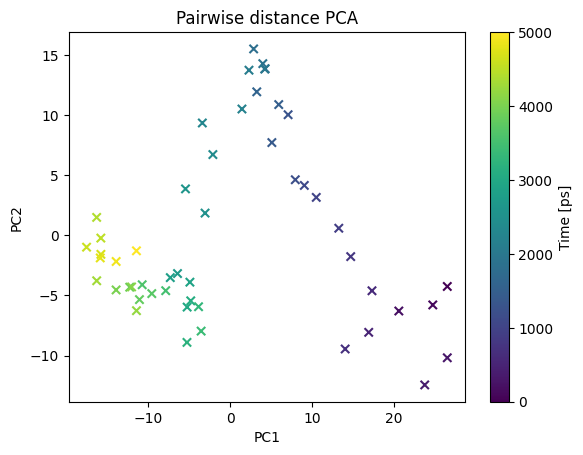

In [ ]:
plt.figure()
plt.scatter(reduced_distances[:, 0], reduced_distances[:,1], marker='x', c=traj.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pairwise distance PCA')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

# save the plot as a PNG file
plt.savefig('Pairwise distance PCA', dpi=300)

# show the plot
plt.show()

# 7 SASA
Solvent Accesible Surface Area

In [ ]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import mdtraj as md

In [ ]:
help(md.shrake_rupley)

Help on function shrake_rupley in module mdtraj.geometry.sasa:

shrake_rupley(traj, probe_radius=0.14, n_sphere_points=960, mode='atom', change_radii=None, get_mapping=False)
    Compute the solvent accessible surface area of each atom or residue in each simulation frame.
    
    Parameters
    ----------
    traj : Trajectory
        An mtraj trajectory.
    probe_radius : float, optional
        The radius of the probe, in nm.
    n_sphere_points : int, optional
        The number of points representing the surface of each atom, higher
        values leads to more accuracy.
    mode : {'atom', 'residue'}
        In mode == 'atom', the extracted areas are resolved per-atom
        In mode == 'residue', this is consolidated down to the
        per-residue SASA by summing over the atoms in each residue.
    change_radii : dict, optional
        A partial or complete dict containing the radii to change from the 
        defaults. Should take the form {"Symbol" : radii_in_nm }, e.g. 
   

In [ ]:
trajectory = md.load('CA-only.h5')
sasa = md.shrake_rupley(trajectory)

print(trajectory)
print('sasa data shape', sasa.shape)

/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


<mdtraj.Trajectory with 51 frames, 317 atoms, 317 residues, and unitcells>
sasa data shape (51, 317)


In [ ]:
total_sasa = sasa.sum(axis=1)
print(total_sasa.shape)

(51,)


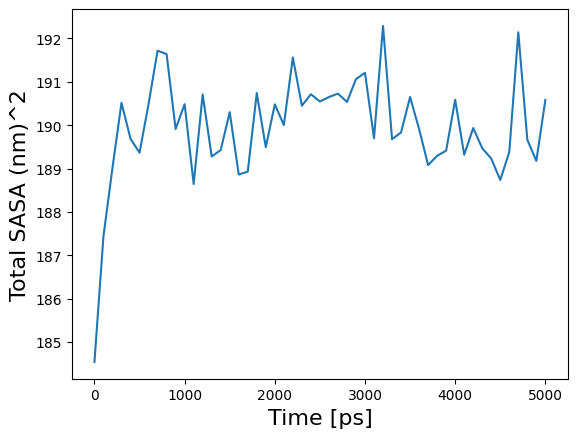

In [ ]:
from matplotlib.pylab import *

plot(trajectory.time, total_sasa)
xlabel('Time [ps]', size=16)
ylabel('Total SASA (nm)^2', size=16)


# save the plot as a PNG file
plt.savefig('Total_SASA.png', dpi=300)

# show the plot
plt.show()

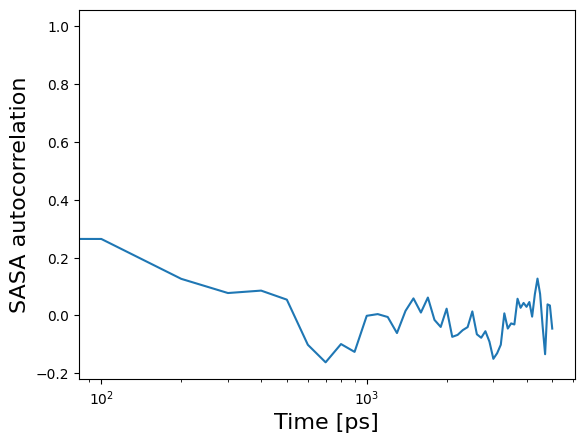

In [ ]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

semilogx(trajectory.time, autocorr(total_sasa))
xlabel('Time [ps]', size=16)
ylabel('SASA autocorrelation', size=16)
show()

# 8 GROMACS ENERGIES (PYTHON)

## 8.1 Python based

### Potential

<ipython-input-13-69bffb4523a8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


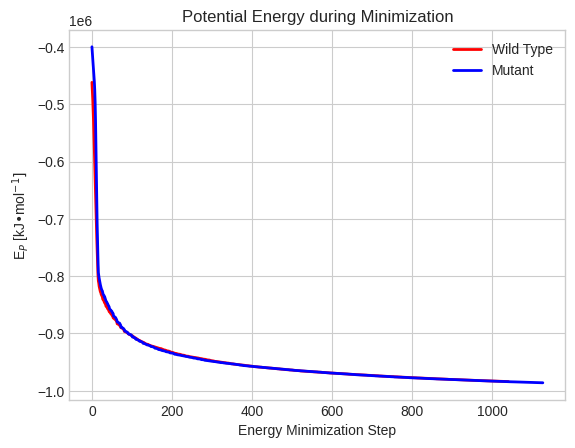

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type potential energy file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/em_potential.xvg')

# Mutant potential energy file
mutant_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/em_potential.xvg')

plt.title('Potential Energy during Minimization')
plt.xlabel('Energy Minimization Step')
plt.ylabel(r'E$_P$ [kJ•mol$^{-1}]$')

# Plotting wild type potential energy
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Wild Type')

# Plotting mutant potential energy
plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='blue', label='Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('potential_plot.png')

# Show the plot
plt.show()


### Temperature

<ipython-input-10-c49bf0295794>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


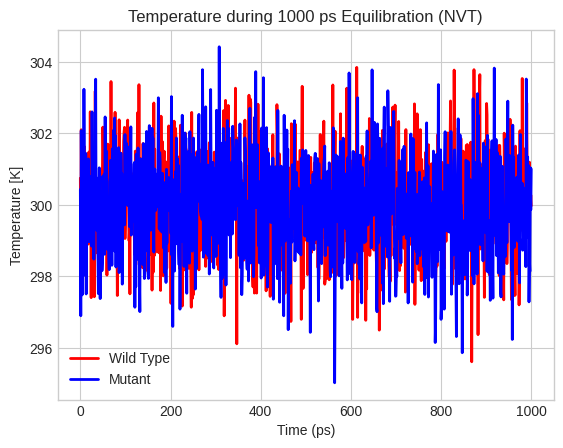

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type temperature file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/nvt_temp.xvg')

# Mutant temperature file
mutant_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/nvt_temp.xvg')

plt.title('Temperature during 1000 ps Equilibration (NVT)')
plt.xlabel('Time (ps)')
plt.ylabel('Temperature [K]')

# Plotting wild type temperature
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Wild Type')

# Plotting mutant temperature
plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='blue', label='Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('temperature_plot.png')

# Show the plot
plt.show()


### Pressure

<ipython-input-11-067eba129480>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


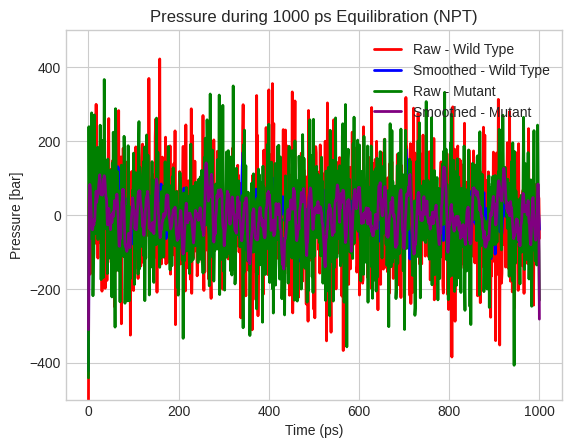

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type pressure file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/npt_press_dens.xvg')

# Mutant pressure file
mutant_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/npt_press_dens.xvg')

plt.title('Pressure during 1000 ps Equilibration (NPT)')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure [bar]')
plt.ylim(-500,500)

# Smoothing using Savitzky-Golay
from scipy.signal import savgol_filter
wild_type_smoothed = savgol_filter(wild_type_data[:,1], 21, 5)
mutant_smoothed = savgol_filter(mutant_data[:,1], 21, 5)

# Plotting raw data and smoothed data for wild type
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Raw - Wild Type')
plt.plot(wild_type_data[:,0], wild_type_smoothed, linestyle='solid', linewidth='2', color='blue', label='Smoothed - Wild Type')

# Plotting raw data and smoothed data for mutant
plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='green', label='Raw - Mutant')
plt.plot(mutant_data[:,0], mutant_smoothed, linestyle='solid', linewidth='2', color='purple', label='Smoothed - Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('pressure_plot.png')

# Show the plot
plt.show()


### Density

<ipython-input-12-e84b735e1ab3>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


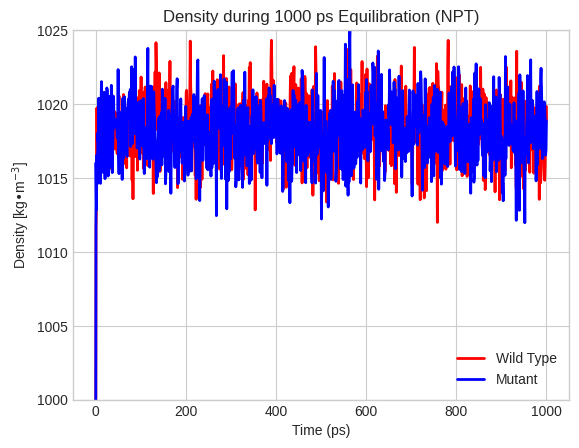

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type density file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/npt_press_dens.xvg')

# Mutant density file
mutant_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/npt_press_dens.xvg')

plt.title('Density during 1000 ps Equilibration (NPT)')
plt.xlabel('Time (ps)')
plt.ylabel('Density [kg•m$^{-3}$]')
plt.ylim(1000,1025)

# Plotting wild type density
plt.plot(wild_type_data[:,0], wild_type_data[:,2], linestyle='solid', linewidth='2', color='red', label='Wild Type')

# Plotting mutant density
plt.plot(mutant_data[:,0], mutant_data[:,2], linestyle='solid', linewidth='2', color='blue', label='Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('density_plot.png')

# Show the plot
plt.show()


## 8.2 GNUPLOT based

8.1 Installation

In [ ]:
!pwd

/content


In [ ]:
# Install gnuplot
!sudo apt-get install gnuplot-x11


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gnuplot-x11 is already the newest version (5.2.8+dfsg1-2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


### Density

In [ ]:
# Set the file path of your data
data_file = '/content/gdrive/MyDrive/works/1aki/theromdynamics/density_copy.xvg'

# Set the plot title, axis labels, and output file name
plot_title = 'Density vs Time'
x_label = 'Time (ps)'
y_label = 'Density (kg/m³)'
output_file = 'density_plot.png'

# Set the plot size and DPI
plot_width = 800
plot_height = 600
dpi = 300

# Define the gnuplot code as a string
gnuplot_code = f"""
set term pngcairo enhanced font 'Arial,14' size {plot_width},{plot_height} fontscale 1.0
set output '{output_file}'
set title "{plot_title}"
set xlabel "{x_label}"
set ylabel "{y_label}"
plot '{data_file}' with lines lw 2 lc rgb "blue"
"""

# Write the gnuplot code to a temporary file
with open('density_plot.gnuplot', 'w') as f:
    f.write(gnuplot_code)

# Run gnuplot and display the resulting plot
!gnuplot density_plot.gnuplot

# Save the plot as a high-resolution file
from PIL import Image
img = Image.open(output_file)
img.save('density_plot_highres.png', dpi=(dpi, dpi))

# Display the plot inline
from IPython.display import Image
Image(filename=output_file)

# Display the high-resolution plot
Image(filename='density_plot_highres.png')


### Potential

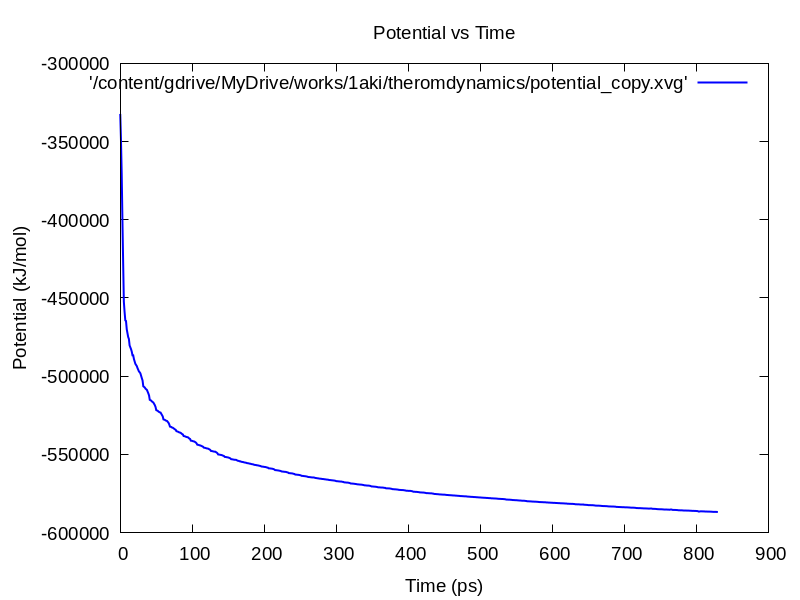

In [ ]:
# Set the file path of your data
data_file = '/content/gdrive/MyDrive/works/1aki/theromdynamics/potential_copy.xvg'

# Set the plot title, axis labels, and output file name
plot_title = 'Potential vs Time'
x_label = 'Time (ps)'
y_label = 'Potential (kJ/mol)'
output_file = 'potential_plot.png'

# Set the plot size and DPI
plot_width = 800
plot_height = 600
dpi = 300

# Define the gnuplot code as a string
gnuplot_code = f"""
set term pngcairo enhanced font 'Arial,14' size {plot_width},{plot_height} fontscale 1.0
set output '{output_file}'
set title "{plot_title}"
set xlabel "{x_label}"
set ylabel "{y_label}"
plot '{data_file}' with lines lw 2 lc rgb "blue"
"""

# Write the gnuplot code to a temporary file
with open('potential_plot.gnuplot', 'w') as f:
    f.write(gnuplot_code)

# Run gnuplot and display the resulting plot
!gnuplot potential_plot.gnuplot

# Save the plot as a high-resolution file
from PIL import Image
img = Image.open(output_file)
img.save('potential_plot_highres.png', dpi=(dpi, dpi))

# Display the plot inline
from IPython.display import Image
Image(filename=output_file)

# Display the high-resolution plot
Image(filename='potential_plot_highres.png')


### Pressure

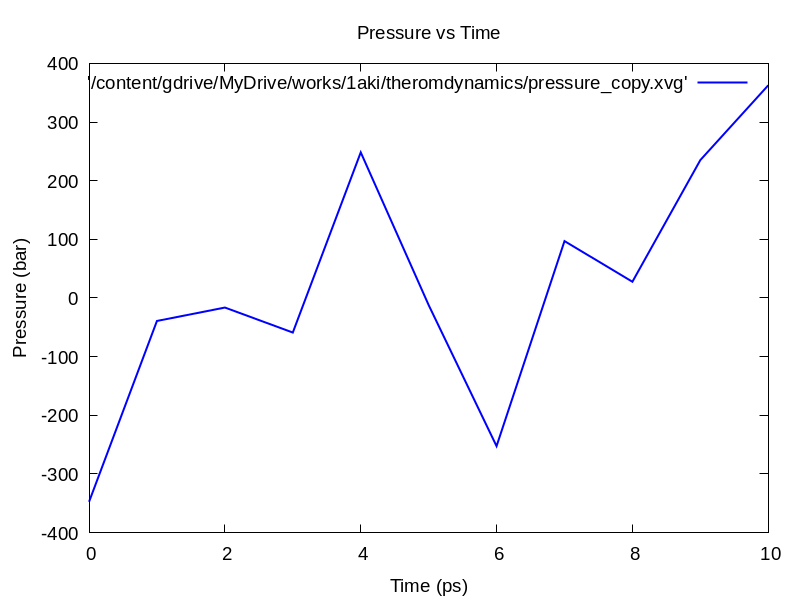

In [ ]:
# Set the file path of your data
data_file = '/content/gdrive/MyDrive/works/1aki/theromdynamics/pressure_copy.xvg'

# Set the plot title, axis labels, and output file name
plot_title = 'Pressure vs Time'
x_label = 'Time (ps)'
y_label = 'Pressure (bar)'
output_file = 'pressure_plot.png'

# Set the plot size and DPI
plot_width = 800
plot_height = 600
dpi = 300

# Define the gnuplot code as a string
gnuplot_code = f"""
set term pngcairo enhanced font 'Arial,14' size {plot_width},{plot_height} fontscale 1.0
set output '{output_file}'
set title "{plot_title}"
set xlabel "{x_label}"
set ylabel "{y_label}"
plot '{data_file}' with lines lw 2 lc rgb "blue"
"""

# Write the gnuplot code to a temporary file
with open('pressure_plot.gnuplot', 'w') as f:
    f.write(gnuplot_code)

# Run gnuplot and display the resulting plot
!gnuplot pressure_plot.gnuplot

# Save the plot as a high-resolution file
from PIL import Image
img = Image.open(output_file)
img.save('pressure_plot_highres.png', dpi=(dpi, dpi))

# Display the plot inline
from IPython.display import Image
Image(filename=output_file)

# Display the high-resolution plot
Image(filename='pressure_plot_highres.png')


### Temperature

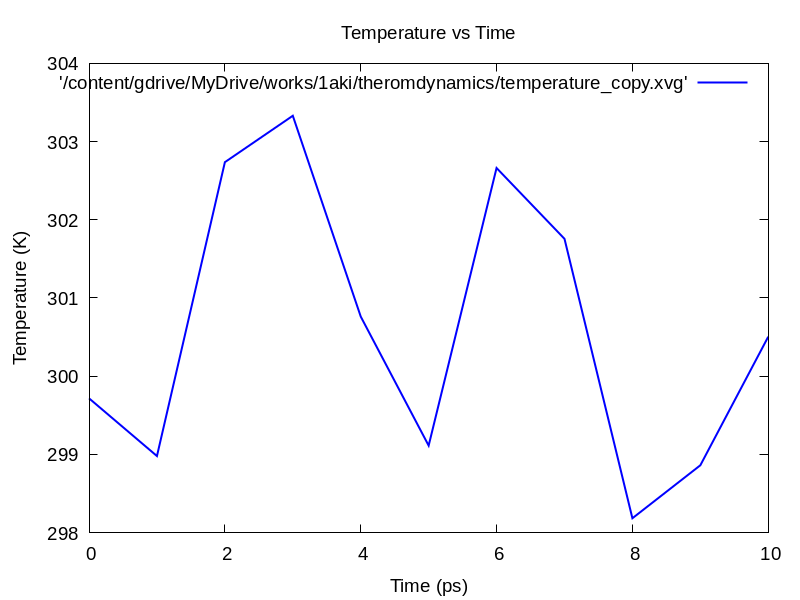

In [ ]:
# Set the file path of your data
data_file = '/content/gdrive/MyDrive/works/1aki/theromdynamics/temperature_copy.xvg'

# Set the plot title, axis labels, and output file name
plot_title = 'Temperature vs Time'
x_label = 'Time (ps)'
y_label = 'Temperature (K)'
output_file = 'temperature_plot.png'

# Set the plot size and DPI
plot_width = 800
plot_height = 600
dpi = 300

# Define the gnuplot code as a string
gnuplot_code = f"""
set term pngcairo enhanced font 'Arial,14' size {plot_width},{plot_height} fontscale 1.0
set output '{output_file}'
set title "{plot_title}"
set xlabel "{x_label}"
set ylabel "{y_label}"
plot '{data_file}' with lines lw 2 lc rgb "blue"
"""

# Write the gnuplot code to a temporary file
with open('temperature_plot.gnuplot', 'w') as f:
    f.write(gnuplot_code)

# Run gnuplot and display the resulting plot
!gnuplot temperature_plot.gnuplot

# Save the plot as a high-resolution file
from PIL import Image
img = Image.open(output_file)
img.save('temperature_plot_highres.png', dpi=(dpi, dpi))

# Display the plot inline
from IPython.display import Image
Image(filename=output_file)

# Display the high-resolution plot
Image(filename='temperature_plot_highres.png')


# 9 Additional

## 9.1 VMD on Google Colab

In [ ]:
!apt-get update
!apt-get install libgl1-mesa-glx libgl1-mesa-dev -y
!wget https://www.ks.uiuc.edu/Research/vmd/vmd-1.9.4/vmd-1.9.4.bin.LINUXAMD64-CUDA10-OptiXJtanzeyt8OSPRay191.opengl.tar.gz
!tar -xvf vmd-1.9.4.bin.LINUXAMD64-CUDA10-OptiXJtanzeyt8OSPRay191.opengl.tar.gz
%cd vmd-1.9.4
!./configure
!cd src && make install
%cd ../

vmd_script = """
mol new /content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro
mol addfile /content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc type xtc waitfor all
mol selupdate 0 top 0
mol modstyle 0 top NewCartoon 0.300000 10.000000 4.100000 0
mol modcolor 0 top ResType
display projection Orthographic
"""

with open('/content/vmd_script.tcl', 'w') as f:
    f.write(vmd_script)

!DISPLAY=:1 ./vmd-1.9.4/vmd -dispdev text -e /content/vmd_script.tcl


In [ ]:
!curl 'https://drive.google.com/u/2/uc?export=download&confirm=Zojy&id=1gj0sQKGTrNQpulQjbDtb84JEmTtIxz30' \
  -H 'authority: drive.google.com' \
  -H 'sec-ch-ua: " Not A;Brand";v="99", "Chromium";v="90", "Google Chrome";v="90"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'upgrade-insecure-requests: 1' \
  -H 'user-agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36' \
  -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' \
  -H 'x-chrome-connected: source=Chrome,id=110916713123928255010,mode=0,enable_account_consistency=false,supervised=false,consistency_enabled_by_default=false' \
  -H 'x-client-data: CKS1yQEIhbbJAQimtskBCMS2yQEIqZ3KAQj4x8oBCK7bygEIqJ3LAQigoMsBCN3yywEYrqnKAQ==' \
  -H 'sec-fetch-site: same-origin' \
  -H 'sec-fetch-mode: navigate' \
  -H 'sec-fetch-user: ?1' \
  -H 'sec-fetch-dest: document' \
  -H 'referer: https://drive.google.com/u/2/uc?id=1gj0sQKGTrNQpulQjbDtb84JEmTtIxz30&export=download' \
  -H 'accept-language: en-US,en;q=0.9,ar-AE;q=0.8,ar;q=0.7' \
  -H 'cookie: download_warning_09905255697999172413_1gj0sQKGTrNQpulQjbDtb84JEmTtIxz30=Zojy; SEARCH_SAMESITE=CgQIyZIB; 1P_JAR=2021-05-18-15; SID=9gc1h-1yrXCxVcmDRHGpq-5bCoz3dv-rsqKxVITnzkoDKvQ6Whzy5QWhUJMyqzmuQzRA4w.; __Secure-3PSID=9gc1h-1yrXCxVcmDRHGpq-5bCoz3dv-rsqKxVITnzkoDKvQ6hMci0onaQ-lPWrWx5pAjIA.; HSID=Ai90-61bqvY9m9RUs; SSID=AXlSaK-rOWGxmNVwt; APISID=suvBz36Ttjdt2h-_/AAd_x8o4-cI7xP6Cy; SAPISID=HolDtw00AFaTd2bJ/A97z3BUfto4fPoEPT; __Secure-3PAPISID=HolDtw00AFaTd2bJ/A97z3BUfto4fPoEPT; NID=215=Hq1jF6mNqUKu-hyg2QerLRLIR3aIOv48N3k5feDCPj-RGSfOsXg7ChmgHkbKpcS1PlzTV25onbPL5_TUFZ8xKjr93YmQc-kmHQ3z7UxOcl4gsAvdc_6m-vGrmduqsGdrRc3ltTzoA6WGWiOQ2C0_9Zb5MLy0LJF5sTUf3kq_k6ugMkzIrUmnzozQHOqJONgqWEDS23evT2pYxcd8WNwELTtNmrkPRgnu-iJoim85efxeR0EmHj2x4tb-7Rj-D1mKbFVhHlozhNSXDehMiPlYgv3pHycZaHrdtSccpX1JPyfME0bXwR-zliUcsil3hmAHrNZYF1HdA_1ZN54Ttj9UwyowCo0YwYdJZPLw2VJ_Lh7XqmKprMU_bc5MUWsEQdOSAg; CONSISTENCY=AKJVzcq2D9EIkVA5jSIjc2GrkKSTUNFZIH9EgMVrWJ1ZhLi_5PjMwBbtAgQvf5sMRgEkQBiNKofrXyB-7uPDdHei59GnCJmefl50FesbNbozWdlMovXmQi2WcKyufenwZun8rZn4yFF_; SIDCC=AJi4QfFHLsXf4TBd4bIu2AvftlQBG6PpgptqqbUI_8eXW-yJeD7FfSVgM4gtaEP_ggsaHmFA6n4P; __Secure-3PSIDCC=AJi4QfFO5PUmqQSI3HaL58Ty5e10RR_scXpEWjopks5c1Xb_Lsi_7nQP-GIQNg3Md-FKMPd92Evc' \
  --compressed \
  --output ste5.dcd

In [ ]:
%%bash
wget https://www.ks.uiuc.edu/Research/vmd/vmd-1.9.3/files/final/vmd-1.9.3.bin.LINUXAMD64.text.tar.gz
tar -zxf vmd-1.9.3.bin.LINUXAMD64.text.tar.gz
cd vmd-1.9.3/
./configure
cd src
sudo make install


In [ ]:
# mol new step3_charmm2namd.psf
# mol addfile all_complex.dcd waitfor all

# package require pbctools
# pbc unwrap -sel "protein or resname UNK"
# animate write dcd all_complex_pbc_corrected.dcd beg 0 end 4999 skip 1 0


In [ ]:
!vmd

Info) VMD for LINUXAMD64, version 1.9.3 (December 1, 2016)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 2 CPUs detected.
Info) Free system memory: 12GB (94%)
Info) Dynamically loaded 2 plugins in directory:
Info) /usr/local/lib/vmd/plugins/LINUXAMD64/molfile
vmd >  mol new /content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro mol addfile /content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc type xtc waitfor all mol selupdate 0 top 0 mol modstyle 0 top NewCartoon 0.300000 10.000000 4.100000 0 mol modcolor 0 top ResType display projection Orthographic
E

In [ ]:
import os

# Set the path to the VMD executable
vmd_path = "/content/vmd-1.9.4/vmd_LINUXAMD64"
os.environ["PATH"] += os.pathsep + vmd_path

# Path to your gro and xtc files
gro_file = "/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro"
xtc_file = "/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc"

# VMD script
script = f"""
mol new {gro_file}
mol addfile {xtc_file} type xtc waitfor all
mol selupdate 0 top 0
mol modstyle 0 top NewCartoon 0.300000 10.000000 4.100000 0
mol modcolor 0 top ResType
display projection Orthographic
"""

# Save the VMD script to a file
script_file = "/content/vmd_script.tcl"
with open(script_file, "w") as f:
    f.write(script)

# Run VMD with the script
!vmd -e {script_file}


Info) VMD for LINUXAMD64, version 1.9.3 (December 1, 2016)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 2 CPUs detected.
Info) Free system memory: 12GB (94%)
Info) Dynamically loaded 2 plugins in directory:
Info) /usr/local/lib/vmd/plugins/LINUXAMD64/molfile
Info) Using plugin gro for structure file /content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro
Info) Using plugin gro for coordinates from file /content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro
Info) Determining bond structure from distance search ...
Info) Analyzing structure ...
Inf

## 9.2 Contact analysis
Contact analysis: number of contacts within a cutoff
Find it here: https://userguide.mdanalysis.org/stable/examples/analysis/distances_and_contacts/contacts_within_cutoff.html

Link: https://userguide.mdanalysis.org/stable/examples/analysis/distances_and_contacts/contacts_custom.html

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Define the file paths for each trajectory
trajectory_files = [
    ('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc'),
    ('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/md_0_1.xtc'),
    ('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS3_Q8IU89/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS3_Q8IU89/md_0_1.xtc'),
    ('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS4_Q9HA82/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS4_Q9HA82/md_0_1.xtc'),
    ('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS5_Q8N5B7/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS5_Q8N5B7/md_0_1.xtc'),
    ('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/md_0_1.xtc')
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Trajectory', 'Frame', 'Contacts from first frame'])

for i, (gro_file, xtc_file) in enumerate(trajectory_files):
    # Load the trajectory
    u = mda.Universe(gro_file, xtc_file)

    sel_basic = "(resname ARG LYS) and (name NH* NZ)"
    sel_acidic = "(resname ASP GLU) and (name OE* OD*)"
    acidic = u.select_atoms(sel_acidic)
    basic = u.select_atoms(sel_basic)

    # Perform the contacts analysis
    ca = contacts.Contacts(u,
                           select=(sel_acidic, sel_basic),
                           refgroup=(acidic, basic),
                           method=fraction_contacts_between,
                           radius=5.0,
                           kwargs={'radius': 5.0, 'min_radius': 2.4}).run()

    # Append the results to the DataFrame
    traj_results = pd.DataFrame(ca.results.timeseries, columns=['Frame', 'Contacts from first frame'])
    traj_results['Trajectory'] = f'Trajectory {i+1}'
    results_df = results_df.append(traj_results, ignore_index=True)

# Display the results
print(results_df.head())


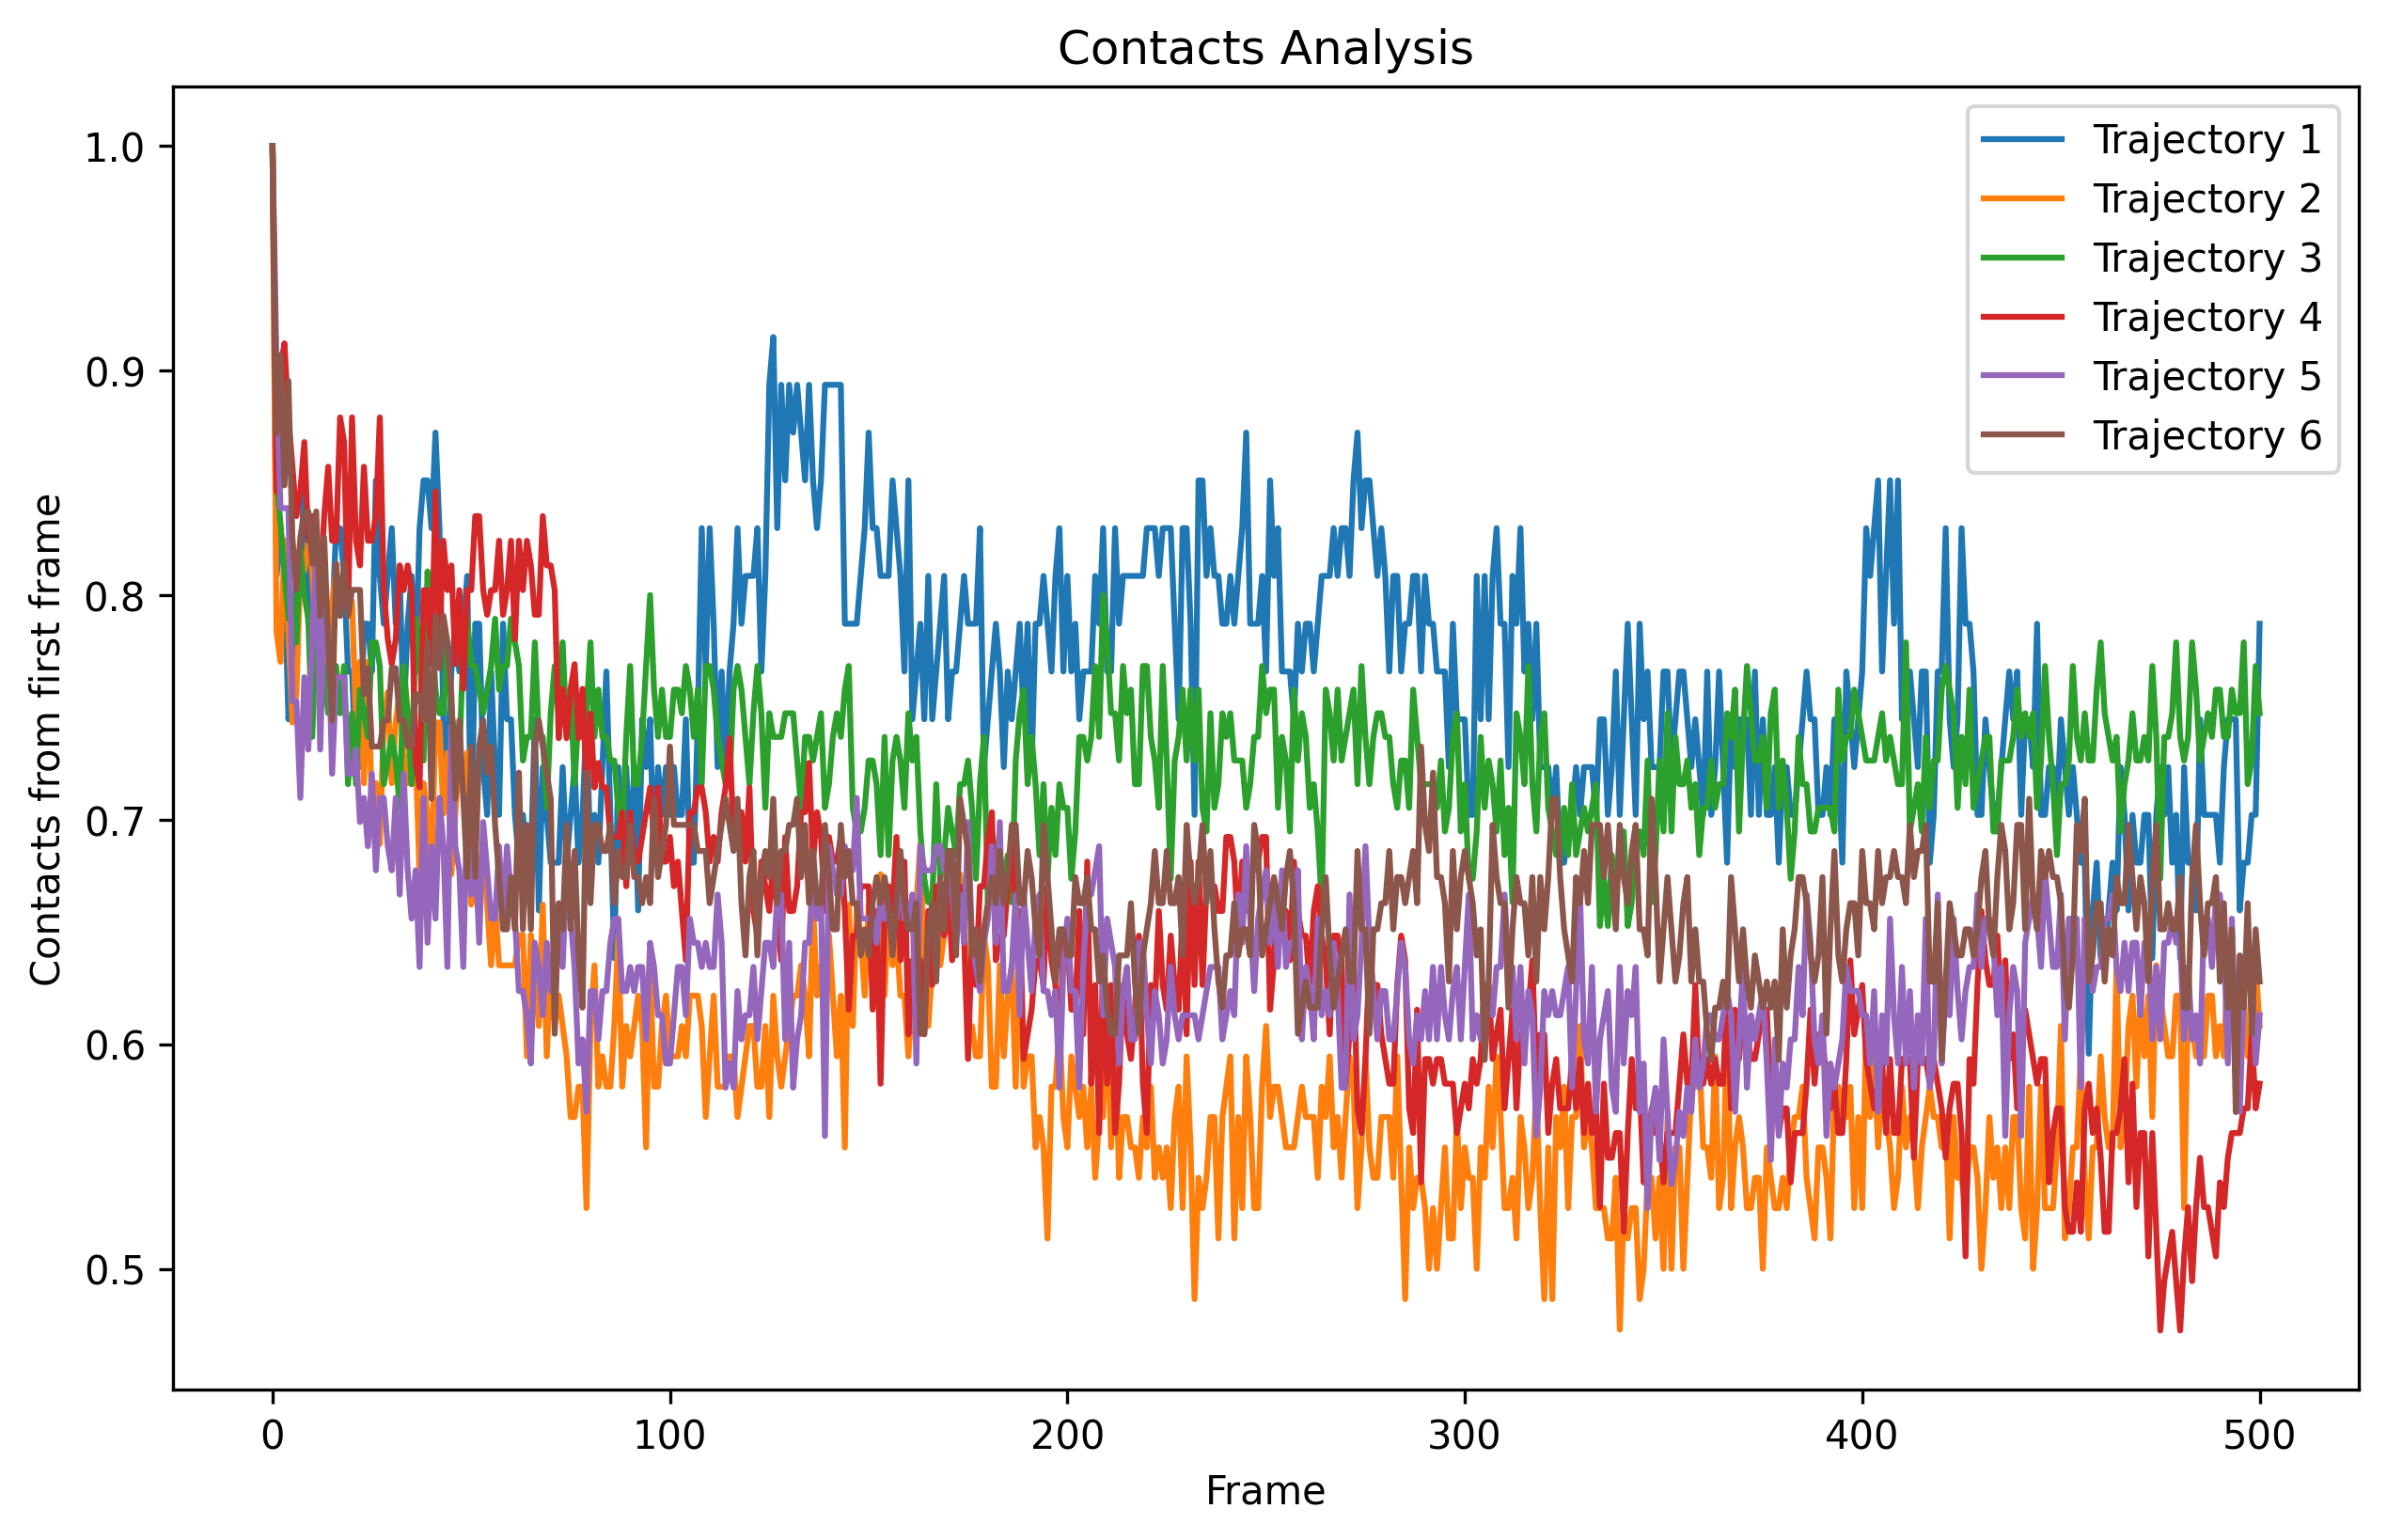

In [ ]:
# Set plot size and DPI for high-resolution output
plt.figure(figsize=(10, 6), dpi=300)

# Plotting for each trajectory
for traj_name in results_df['Trajectory'].unique():
    traj_data = results_df[results_df['Trajectory'] == traj_name]
    plt.plot(traj_data['Frame'], traj_data['Contacts from first frame'], label=traj_name)

# Set plot labels and title
plt.xlabel('Frame')
plt.ylabel('Contacts from first frame')
plt.title('Contacts Analysis')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('contacts_analysis.png')

# Display the plot
plt.show()


The analysis of contact fractions between acidic and basic residues in the trajectories of ceramide synthase 1 to 6 (CERS1 to CERS6) offers valuable insights into the dynamics and interactions within these enzymes. Ceramide synthases are crucial enzymes involved in the synthesis of ceramides, which are important lipid molecules with diverse cellular functions. By examining the contact fractions, it becomes possible to identify key interacting residues within the enzymes. These residues may play pivotal roles in the structure, function, and interactions of the enzymes with other molecules. Moreover, the contact analysis provides valuable information about the dynamic behavior of the ceramide synthase enzymes, revealing variations in conformational changes, flexibility, and stability among different trajectories. Additionally, this analysis provides insights into the enzyme-substrate interactions, shedding light on the molecular mechanisms underlying ceramide synthesis. Comparing the contact fractions of different isoforms, such as CERS1 to CERS6, allows for the identification of similarities and differences in their interaction patterns. Ultimately, these findings contribute to a deeper understanding of the structural dynamics, interactions, and functional significance of ceramide synthase enzymes in ceramide synthesis. The knowledge gained from this analysis has potential implications for various cellular processes where ceramides play essential roles, including cell signaling, apoptosis, and lipid metabolism.

## 9.3 Elastic network analysis
link: https://userguide.mdanalysis.org/stable/examples/analysis/structure/elastic_network.html

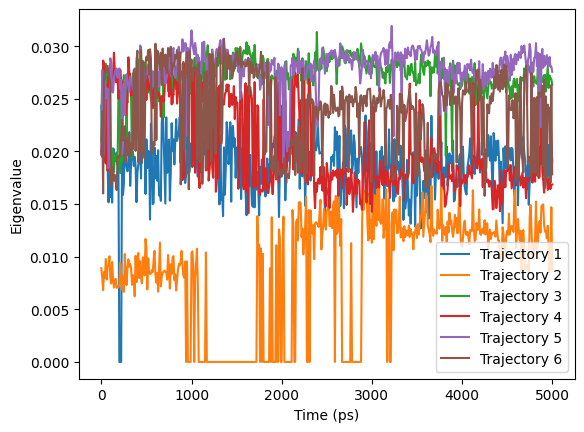

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import gnm
import matplotlib.pyplot as plt
%matplotlib inline

# Define the data locations for the six trajectories
u1 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/md_0_1.xtc')
u3 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS3_Q8IU89/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS3_Q8IU89/md_0_1.xtc')
u4 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS4_Q9HA82/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS4_Q9HA82/md_0_1.xtc')
u5 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS5_Q8N5B7/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS5_Q8N5B7/md_0_1.xtc')
u6 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/md_0_1.xtc')

# Perform GNM analysis on each trajectory
nma1 = gnm.GNMAnalysis(u1, select='name CA', cutoff=7.0)
nma1.run()

nma2 = gnm.GNMAnalysis(u2, select='name CA', cutoff=7.0)
nma2.run()

nma3 = gnm.GNMAnalysis(u3, select='name CA', cutoff=7.0)
nma3.run()

nma4 = gnm.GNMAnalysis(u4, select='name CA', cutoff=7.0)
nma4.run()

nma5 = gnm.GNMAnalysis(u5, select='name CA', cutoff=7.0)
nma5.run()

nma6 = gnm.GNMAnalysis(u6, select='name CA', cutoff=7.0)
nma6.run()

# Plot and save the eigenvalue data for each trajectory
linefig, lineax = plt.subplots()
plt.plot(nma1.results['times'], nma1.results['eigenvalues'], label='Trajectory 1')
plt.plot(nma2.results['times'], nma2.results['eigenvalues'], label='Trajectory 2')
plt.plot(nma3.results['times'], nma3.results['eigenvalues'], label='Trajectory 3')
plt.plot(nma4.results['times'], nma4.results['eigenvalues'], label='Trajectory 4')
plt.plot(nma5.results['times'], nma5.results['eigenvalues'], label='Trajectory 5')
plt.plot(nma6.results['times'], nma6.results['eigenvalues'], label='Trajectory 6')
lineax.set_xlabel('Time (ps)')
lineax.set_ylabel('Eigenvalue')
plt.legend()

# Save the plot in high resolution
linefig.savefig('/content/gdrive/MyDrive/works/230704_cer_synthase/eigenvalue_plot.png', dpi=300)


The plot of eigenvalues for the six trajectories of ceramide synthase 1 to 6 provides insight into the dynamics and flexibility of the protein. Eigenvalues represent the vibrational modes or motions of a protein structure. Higher eigenvalues correspond to slower, global motions, while lower eigenvalues correspond to faster, local motions.

By analyzing the eigenvalues, we can infer the relative flexibility and rigidity of the protein. If a trajectory exhibits higher eigenvalues, it suggests that the protein undergoes slower, coordinated motions, indicating a more rigid or constrained structure. On the other hand, lower eigenvalues indicate more flexible and dynamic regions within the protein.

By comparing the eigenvalues across the six trajectories, we can identify similarities or differences in the dynamics of ceramide synthase 1 to 6. If the eigenvalues show consistent patterns across the trajectories, it implies that the overall dynamics of the protein are similar. Conversely, variations in the eigenvalue profiles may indicate differences in the flexibility and conformational changes among the ceramide synthase variants.

Therefore, the plot of eigenvalues provides valuable information about the dynamics and flexibility of ceramide synthase 1 to 6, enabling us to gain insights into their functional properties and potential structural differences.

## 9.4 Using a Gaussian network model with only close contacts

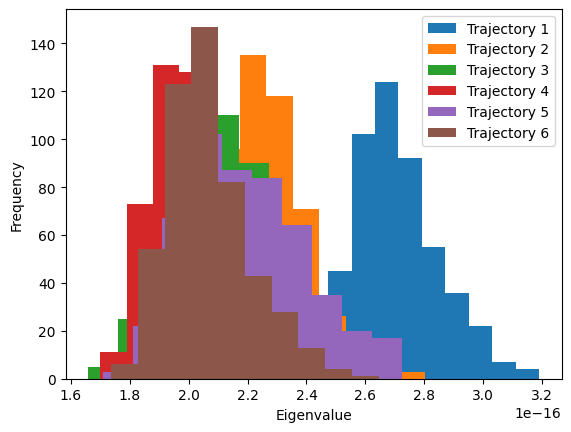

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import gnm
import matplotlib.pyplot as plt
%matplotlib inline

# Define the data locations for the six trajectories
u1 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/md_0_1.xtc')
u3 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS3_Q8IU89/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS3_Q8IU89/md_0_1.xtc')
u4 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS4_Q9HA82/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS4_Q9HA82/md_0_1.xtc')
u5 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS5_Q8N5B7/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS5_Q8N5B7/md_0_1.xtc')
u6 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/md_0_1.xtc')

# Perform close contact GNM analysis and plot histogram of eigenvalues for each trajectory
nma_close1 = gnm.closeContactGNMAnalysis(u1, select='name CA', cutoff=7.0, weights='size')
nma_close1.run()

nma_close2 = gnm.closeContactGNMAnalysis(u2, select='name CA', cutoff=7.0, weights='size')
nma_close2.run()

nma_close3 = gnm.closeContactGNMAnalysis(u3, select='name CA', cutoff=7.0, weights='size')
nma_close3.run()

nma_close4 = gnm.closeContactGNMAnalysis(u4, select='name CA', cutoff=7.0, weights='size')
nma_close4.run()

nma_close5 = gnm.closeContactGNMAnalysis(u5, select='name CA', cutoff=7.0, weights='size')
nma_close5.run()

nma_close6 = gnm.closeContactGNMAnalysis(u6, select='name CA', cutoff=7.0, weights='size')
nma_close6.run()

# Plot histogram of eigenvalues for each trajectory
plt.hist(nma_close1.results['eigenvalues'], label='Trajectory 1')
plt.hist(nma_close2.results['eigenvalues'], label='Trajectory 2')
plt.hist(nma_close3.results['eigenvalues'], label='Trajectory 3')
plt.hist(nma_close4.results['eigenvalues'], label='Trajectory 4')
plt.hist(nma_close5.results['eigenvalues'], label='Trajectory 5')
plt.hist(nma_close6.results['eigenvalues'], label='Trajectory 6')

plt.xlabel('Eigenvalue')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The code performs close contact Gaussian Network Model (GNM) analysis on six trajectories of ceramide synthase proteins. The plot generated shows histograms of eigenvalues for each trajectory.

Interpretation:

- Eigenvalues represent the vibrational modes or motions of the system. Higher eigenvalues indicate more significant motions.
- The histograms show the distribution of eigenvalues for each trajectory, providing insights into the dynamic behavior of the ceramide synthase proteins.
- The x-axis represents the eigenvalues, while the y-axis represents the frequency or count of eigenvalues falling within each bin.
- The height of each bar in the histogram indicates the frequency of occurrence of eigenvalues in that range.
- Comparing the histograms between trajectories allows for the comparison of their respective dynamic behaviors.
- Differences in the shape, peak positions, or spread of the histograms may indicate variations in the conformational dynamics or flexibility of the ceramide synthase proteins.
- If the histograms exhibit distinct peaks or multiple peaks, it suggests the presence of different vibrational modes or conformational substates within the system.
- By analyzing the histograms of eigenvalues for the six trajectories, researchers can gain insights into the dynamic behavior and conformational changes of the ceramide synthase proteins and identify potential similarities or differences between them.

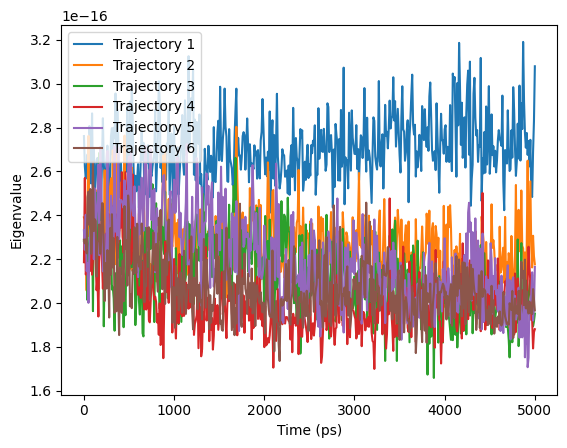

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import gnm
import matplotlib.pyplot as plt
%matplotlib inline

# Define the data locations for the six trajectories
u1 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS1_P27544/md_0_1.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS2_Q96G23/md_0_1.xtc')
u3 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS3_Q8IU89/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS3_Q8IU89/md_0_1.xtc')
u4 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS4_Q9HA82/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS4_Q9HA82/md_0_1.xtc')
u5 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS5_Q8N5B7/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS5_Q8N5B7/md_0_1.xtc')
u6 = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/md_0_1.xtc')

# Perform close contact GNM analysis for each trajectory
nma_close1 = gnm.closeContactGNMAnalysis(u1, select='name CA', cutoff=7.0, weights='size')
nma_close1.run()

nma_close2 = gnm.closeContactGNMAnalysis(u2, select='name CA', cutoff=7.0, weights='size')
nma_close2.run()

nma_close3 = gnm.closeContactGNMAnalysis(u3, select='name CA', cutoff=7.0, weights='size')
nma_close3.run()

nma_close4 = gnm.closeContactGNMAnalysis(u4, select='name CA', cutoff=7.0, weights='size')
nma_close4.run()

nma_close5 = gnm.closeContactGNMAnalysis(u5, select='name CA', cutoff=7.0, weights='size')
nma_close5.run()

nma_close6 = gnm.closeContactGNMAnalysis(u6, select='name CA', cutoff=7.0, weights='size')
nma_close6.run()

# Plot eigenvalues over time for each trajectory
plt.plot(nma_close1.results['times'], nma_close1.results['eigenvalues'], label='Trajectory 1')
plt.plot(nma_close2.results['times'], nma_close2.results['eigenvalues'], label='Trajectory 2')
plt.plot(nma_close3.results['times'], nma_close3.results['eigenvalues'], label='Trajectory 3')
plt.plot(nma_close4.results['times'], nma_close4.results['eigenvalues'], label='Trajectory 4')
plt.plot(nma_close5.results['times'], nma_close5.results['eigenvalues'], label='Trajectory 5')
plt.plot(nma_close6.results['times'], nma_close6.results['eigenvalues'], label='Trajectory 6')

plt.xlabel('Time (ps)')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()


The plot shows the eigenvalues over time for each of the six trajectories in the ceramide synthase analysis. Eigenvalues represent the vibrational modes or motions of the system. In this case, the eigenvalues correspond to the closeness of contacts between CA atoms in the system.

Interpretation:

- The eigenvalues represent the magnitude of the vibrational modes, with higher eigenvalues indicating more significant motions.
The plot allows us to compare the eigenvalue trends across the six trajectories.
- If the eigenvalues show a consistent increase or decrease over time for a specific trajectory, it suggests a systematic change in the dynamics of the system.
- Differences in eigenvalue profiles between trajectories may indicate variations in the behavior or conformational dynamics of the ceramide synthase proteins.
- The relative magnitudes of the eigenvalues can provide insights into the relative flexibility or rigidity of the system.
- Peaks or fluctuations in the eigenvalue curves may indicate specific time intervals where the system undergoes pronounced motions or transitions.
- By analyzing the eigenvalue trends and comparing them between trajectories, researchers can gain insights into the dynamic behavior and conformational changes of the ceramide synthase proteins.

- now you have some precompiled pca code on yoru drive
- open these and try

## 9.5 Conversiton of Trajectories
Sometimes it is necessary to convert a GRO file to a PDB file and an XTC file to a DCD file. If needed, these conversions can be performed using appropriate tools. However, it is worth noting that MDAnalysis supports both types of files, eliminating the need for manual conversion in those cases.

In [ ]:
# Change the directory to the working path since data will be generated specified directory
%cd /content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9

/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9


In [ ]:
# reading data
import MDAnalysis as mda
u = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/md_0_1.xtc')

# convert to pdb
import MDAnalysis as mda
u = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/md_0_1.xtc')
ag = u.select_atoms("name CA")
ag.write("1AKI_solv_ions.pdb")

# convert to xtc
# Pass in the frames keyword to write out trajectories.
ag.write('md_0_1_all.xtc', frames='all')

# make xtc to dcd with all frames
ag.write('md_0_1_all.trr', frames='all')
ag.write('md_0_1_all.dcd', frames='all')

## 9.5a TEST the conversion works

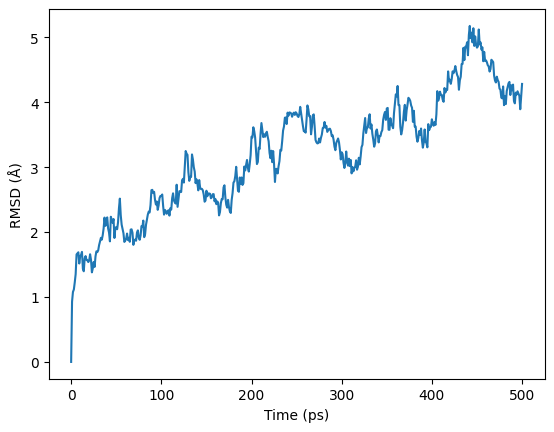

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt

# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/1AKI_solv_ions.pdb', '/content/gdrive/MyDrive/works/230704_cer_synthase/CERS6_Q6ZMG9/md_0_1_all.dcd')

# calculate the RMSD
ref = u.select_atoms('protein')
R = rms.RMSD(u, ref, select='backbone', groupselections=['protein'])
R.run()

# plot the RMSD
plt.plot(R.rmsd[:,1], R.rmsd[:,2])
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Å)')

# save the plot as a PNG file
# plt.savefig('rmsd_plot.png', dpi=300)

# show the plot
plt.show()
